In [168]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [169]:
#行動データ
work_detail = pd.read_csv('../../datas/groupby_widedata/work_detail.csv')
work_env = pd.read_csv('../../datas/groupby_widedata/work_env.csv')
#fitbitデータ
calories = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/calories_day.csv')
floors = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/floors_day.csv')
heart = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/heart_day.csv')
minutesFairlyActive= pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesFairlyActive_day.csv')
minutesLightlyActive = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesLightlyActive_day.csv')
minutesSedentary = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesSedentary_day.csv')
minutesVeryActive = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesVeryActive_day.csv')
steps = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/steps_day.csv')
sleep = pd.read_csv('../../datas/fitbit_preprocessed_data/sleep.csv')
#アンケートデータ
morning_bodyfatigue = pd.read_csv('./analyse_data/questionaire_data/morning_bodyfatigue.csv')
morning_dams = pd.read_csv('./analyse_data/questionaire_data/morning_dams.csv')
night_w_bodyfatigue = pd.read_csv('./analyse_data/questionaire_data/night_w_bodyfatigue.csv')
night_w_dams = pd.read_csv('./analyse_data/questionaire_data/night_w_dams.csv')
night_w_eval = pd.read_csv('./analyse_data/questionaire_data/night_w_eval.csv')
night_w_productivity = pd.read_csv('./analyse_data/questionaire_data/night_w_productivity.csv')
night_w_recover = pd.read_csv('./analyse_data/questionaire_data/night_w_recover.csv')
night_w_workenga = pd.read_csv('./analyse_data/questionaire_data/night_w_workenga.csv')
#天気データ
weather = pd.read_csv('../../datas/attribute_weater.csv')

In [170]:
night_w_dams['positive_score'] = night_w_dams['haturatu']+night_w_dams['tanosii']+night_w_dams['uresii']/3
night_w_dams['depressive_score'] = night_w_dams['kurai']+night_w_dams['iyana']+night_w_dams['sizunda']/3
night_w_dams['anxious_score'] = night_w_dams['kigakari']+night_w_dams['fuan']+night_w_dams['sinpai']/3

In [171]:
def to_datetime_jp2(x, datetime):
    x.index = pd.DatetimeIndex(x[datetime], name=datetime).tz_convert('Asia/Tokyo')
    x[datetime] = x.index
    x = x.reset_index(drop=True)
#     x[datetime] = x[datetime]+timedelta(days=1)
    x['date'] = x[datetime].dt.date
    return x

In [172]:
activity = activity.reset_index(drop=True)

In [173]:
value_unique = activity['activity'].unique()
zero_td = dt.timedelta(days=0, hours=0, minutes=0,
                        seconds=0, milliseconds=0, microseconds=0)
activity['started_at'] = pd.to_datetime(activity['started_at'])
activity['finished_at'] = pd.to_datetime(activity['finished_at'])
for i in range(len(value_unique)):
    activity['{}'.format(value_unique[i])] = zero_td  #timedeltaの０で埋める
    activity.loc[activity['activity']==value_unique[i],value_unique[i]]=activity['finished_at']-activity['started_at']  #行動の継続時間を計算
    activity['{}'.format(value_unique[i])] = activity['{}'.format(value_unique[i])].dt.total_seconds()/60  #
activity['date'] = activity['finished_at'].dt.date

KeyError: 'activity'

In [180]:
activity = activity.groupby(['date','user_id'],as_index=False).sum()

## アンケートデータの前処理

In [237]:
# def hour9():
attribute_weather = pd.read_csv('../../datas/attribute_weater.csv')
attribute_weather = attribute_weather[['Date', 'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6', 'locate', 'user_id', 'sex', 'age']]

In [176]:
labeling(morning_bodyfatigue, 'value_hukai')
labeling(morning_bodyfatigue, 'value_boyake')
labeling(morning_bodyfatigue, 'value_nemuke')
labeling(morning_dams, 'positive_score')
labeling(morning_dams, 'depressive_score')
labeling(morning_dams, 'anxious_score')

labeling(night_w_bodyfatigue, 'value_hukai')
labeling(night_w_bodyfatigue, 'value_boyake')
labeling(night_w_bodyfatigue, 'value_nemuke')
labeling(night_w_dams, 'positive_score')
labeling(night_w_dams, 'depressive_score')
labeling(night_w_dams, 'anxious_score')
#夜アンケー自己評価
labeling(night_w_eval, 'kouritu')
labeling(night_w_eval, 'syutyu')
labeling(night_w_eval, 'yoteidori')
labeling(night_w_eval, 'jubun_comu')
labeling(night_w_eval, 'kouritu_comu')
labeling(night_w_eval, 'idea')
labeling(night_w_eval, 'seika')
#夜アンケー生産性
labeling(night_w_productivity, 'study_new')
labeling(night_w_productivity, 'decide_doing')
labeling(night_w_productivity, 'paformance')
labeling(night_w_productivity, 'absent_by_problem')
#夜アンケーリカバリー経験
labeling(night_w_recover, 'value_recover')
#夜アンケーワークエンゲージメント
labeling(night_w_workenga, 'workenga_score')

## それぞれのデータをマージ

In [177]:
#いらないカラムを捨てる
work_detail = work_detail[['date', 'user_id', 
       '管理者兼作業者', '企画業務', 'ノンコア業務（自身が本来担当ではない業務）', '管理者',
       '比較的慣れており，定型化できている業務', 'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務',
       '作業者/参加者', '管理の業務', '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務',
       '事務業務（サポート業務、経理業務など）', '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）']]
work_env = work_env[['date', 'user_id',
       '家（その他）', 'どちらでもない', '一人', '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）',
       '快適', '職場外のワークスペース', '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外',
       '不快', '非常に快適', '職場外ワークスペース', '非常に不快']]
calories = calories[[ 'user_id', 'date', 'mets_mean', 'calory_mean',
       'mets_median', 'calory_median', 'mets_var', 'calory_var', 'date_plus1']]
floors = floors[[ 'user_id', 'date', 'floor_mean', 'floor_median',
       'floor_var', 'date_plus1']]
heart = heart[['user_id', 'date', 'heart_mean', 'heart_median',
       'heart_var', 'date_plus1']]
minutesFairlyActive = minutesFairlyActive[['user_id', 'date', 'minutesFairlyActive_mean',
       'minutesFairlyActive_median', 'minutesFairlyActive_var', 'date_plus1']]
minutesLightlyActive = minutesLightlyActive[['user_id', 'date', 'minutesLightlyActive_mean',
       'minutesLightlyActive_median', 'minutesLightlyActive_var',
       'date_plus1']]
minutesSedentary = minutesSedentary[['user_id', 'date', 'minutesSedentary_mean',
       'minutesSedentary_median', 'minutesSedentary_var', 'date_plus1']]
minutesVeryActive = minutesVeryActive[[ 'user_id', 'date', 'minutesVeryActive_mean',
       'minutesVeryActive_median', 'minutesVeryActive_var', 'date_plus1']]
steps = steps[[ 'user_id', 'date', 'step_mean', 'step_median', 'step_var',
       'date_plus1']]
sleep = sleep[['Unnamed: 0', 'date', 'user_id', 'sleep', 'Unnamed: 0.1', 'datetime',
       'dateTime', 'sleep_1', 'sleep_2', 'sleep_3']]
morning_bodyfatigue = morning_bodyfatigue[[ 'date', 'user_id', 'value_nemuke',
       'value_hukai', 'value_boyake', 'value_nemuke_label',
       'value_hukai_label', 'value_boyake_label']]
morning_dams = morning_dams[[ 'user_id', 'Date_jp',  'date',
       'positive_score_label', 'depressive_score_label',
       'anxious_score_label']]
night_w_bodyfatigue = night_w_bodyfatigue[['user_id', 'date',
       'value_hukai_label', 'value_boyake_label', 'value_nemuke_label']]
night_w_dams = night_w_dams[[ 'date', 'user_id', 'positive_score_label',
       'depressive_score_label', 'anxious_score_label']]
night_w_eval = night_w_eval[['datetime_jp', 'user_id',
       'value_eval', 'hour', 
       'date', 'kouritu_label', 'syutyu_label', 'yoteidori_label',
       'jubun_comu_label', 'kouritu_comu_label', 'idea_label', 'seika_label']]
night_w_productivity = night_w_productivity[['datetime_jp', 'user_id',
       'date', 'study_new_label', 'decide_doing_label', 'paformance_label',
       'absent_by_problem_label']]
night_w_recover = night_w_recover[['datetime_jp', 'user_id', 
       'date', 'value_recover_label']]
night_w_workenga = night_w_workenga[['datetime_jp', 'user_id', 
        'date','workenga_score_label']]


In [178]:
activity = activity[[ 'user_id','date', '食事（業務時間外）',
       '単独作業', '趣味・休憩', '家事・育児', '休憩（業務時間内）', '移動', 'Web会議', 'その他', '業務外作業',
       '対面会議', '共同作業（コミュニケーションを伴う）', '電話（会議）']]

In [588]:
# アクティビティデータのマージ
merged_act = pd.merge(activity_1, work_detail_1, on=['date','user_id'],how='left')
# merged_act = pd.merge(merged_act, merged_act, on=['date', 'user_id'],how='left')

# work_env.to_csv('./work_data/work_env.csv')

In [222]:
#fitbitデータ
merged_fitbit = pd.merge(calories, floors, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, heart, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, minutesFairlyActive, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, minutesLightlyActive, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, minutesSedentary, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, minutesVeryActive, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, steps, on=['date', 'user_id'], how='left')
merged_fitbit = pd.merge(merged_fitbit, sleep, on=['date', 'user_id'], how='left')
# calories.to_csv('./fitbit/calories.csv')
# floors.to_csv('./fitbit/floors.csv')
# heart.to_csv('./fitbit/heart.csv')
# minutesFairlyActive.to_csv('./fitbit/minutesFairlyActive.csv')
# minutesLightlyActive.to_csv('./fitbit/minutesLightlyActive.csv')
# minutesSedentary.to_csv('./fitbit/minutesSedentary.csv')
# minutesVeryActive.to_csv('./fitbit/minutesVeryActive.csv')
# steps.to_csv('./fitbit/steps.csv')
# sleep.to_csv('./fitbit/sleep.csv')

In [406]:
#アンケートデータのマージ
#朝
merged_morning['merge_date'] = pd.to_datetime(merged_morning['date'])-dt.timedelta(days=1)

#平日夜
merged_night_w = pd.merge(night_w_dams, night_w_bodyfatigue, on=['date','user_id'], how='left')
merged_night_w = pd.merge(merged_night_w, night_w_eval, on=['date','user_id'], how='left')
merged_night_w = pd.merge(merged_night_w, night_w_productivity, on=['date','user_id'], how='left')
merged_night_w = pd.merge(merged_night_w, night_w_recover, on=['date','user_id'], how='left')
merged_night_w = pd.merge(merged_night_w, night_w_workenga, on=['date','user_id'], how='left')

In [414]:
merged_night_w['date'] = pd.to_datetime(merged_night_w['date'])

In [415]:
merged_mor_night_ques = pd.merge(merged_morning, merged_night_w, left_on=['merge_date','user_id'],right_on=['date','user_id'])
# merged_mor_night_ques.to_csv('./merged_mor_night_ques.csv')

In [420]:
merged_mor_night_ques.columns
merge_all.columns

Index(['Unnamed: 0_x_x', 'date', 'user_id', '食事（業務時間外）_x', '単独作業_x', '趣味・休憩_x',
       '家事・育児_x', '休憩（業務時間内）_x', '移動_x', 'Web会議_x',
       ...
       'max_temperature', 'mini_temperature', 'sum_rainfall', 'sunlight_time',
       'ave_windspeed', 'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover',
       'sex', 'age'],
      dtype='object', length=119)

In [421]:
# merged_night_w.to_csv('./merged_data/merged_night_w.csv')
# merged_fitbit.to_csv('./merged_data/merged_fitbit.csv')
# merged_act.to_csv('./merged_data/merged_act.csv')
attribute_weather = pd.read_csv('./attribute_weather.csv')
attribute_weather['sex']=attribute_weather['sex'].replace(2,0)
attribute_weather=attribute_weather.drop(['weather_6to18','weather_18to6','locate'],axis=1)
merge_all = pd.merge(merged_fitbit, attribute_weather, right_on=['Date','user_id'],left_on=['date','user_id'],how='left')
merge_all = pd.merge(merged_act, merge_all, on=['date','user_id'])
merge_all = pd.merge(merged_mor_night_ques, merge_all,left_on=['date_x','user_id'],right_on=['date','user_id'],how='inner')

### 欠損値の補完

In [422]:
def null_replace_ffill(df):
    for i in range(105):
        df = df.sort_values(['user_id', 'date'])
        df_user = df[df.user_id==i]
        df_user.fillna(method='ffill')
    return df

In [423]:
merged_fitbit = null_replace_ffill(merged_fitbit)
merged_fitbit['weekday'] = pd.to_datetime(merged_fitbit['date']).dt.weekday

In [446]:
# merge_all.to_csv('./merge_all.csv')
#それぞれの種類ごとにアンケートデータとマージする
fitbit_ques = pd.merge(merged_mor_night_ques,merged_fitbit, left_on=['date_x','user_id'],right_on=['date','user_id'])
fitbit_ques.columns

Index(['user_id', 'Date_jp', 'date_x', 'positive_score_label_x',
       'depressive_score_label_x', 'anxious_score_label_x', 'value_nemuke',
       'value_hukai', 'value_boyake', 'value_nemuke_label_x',
       'value_hukai_label_x', 'value_boyake_label_x', 'merge_date', 'date_y',
       'positive_score_label_y', 'depressive_score_label_y',
       'anxious_score_label_y', 'value_hukai_label_y', 'value_boyake_label_y',
       'value_nemuke_label_y', 'datetime_jp_x', 'value_eval', 'hour',
       'kouritu_label', 'syutyu_label', 'yoteidori_label', 'jubun_comu_label',
       'kouritu_comu_label', 'idea_label', 'seika_label', 'datetime_jp_y',
       'study_new_label', 'decide_doing_label', 'paformance_label',
       'absent_by_problem_label', 'datetime_jp_x', 'value_recover_label',
       'datetime_jp_y', 'workenga_score_label', 'date', 'mets_mean',
       'calory_mean', 'mets_median', 'calory_median', 'mets_var', 'calory_var',
       'date_plus1_x', 'floor_mean', 'floor_median', 'floor_var'

In [430]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)

def lgbm_model(df, df_x, df_y):
    # ques_act_day_pred['user_id'] = ques_act_day_pred['user_id'].astype('int')
    df=df[df_y !=1]
    X = df_x
    y = df_y.replace(2,1).astype('int')

    # kfoldの分割数
    k = 5
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
    # 学習条件を設定
    params = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': {'binary_error'},
              'num_class': 1,
              'learning_rate': 0.02,
              'num_leaves': 23,
              'min_data_in_leaf': 1,
              'num_iteration': 1000,
              'verbose': 0,
              'reg_alpha':0.93,
              'reg_lambda':2.3
              }
    
    acc_list = []
    f1_list = []
    auc_list = []
    
    for train_index, test_index in skf.split(X, y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        # ここではvalidをモデル評価、evalをフォールドアウト検証に使う・・・分割の大きさはデータセットと相談する
        X_eval, X_valid, y_eval, y_valid = train_test_split(X_test, y_test, random_state=90, 
                                                            shuffle=True, stratify=y_test, test_size=0.3)
        # データセットを生成する
        lgb_train = lgb.Dataset(X_train, y_train)

        # モデル評価用
        lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
        # 学習する
        model = lgb.train(params,
                          lgb_train,
                          num_boost_round=50,
                          valid_sets=lgb_valid,
                          early_stopping_rounds=20)
        
        y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
        y_pred = [0 if i < 0.5 else 1 for i in y_pred_prob]
        
        # acc : 正答率
        acc = accuracy_score(y_test,y_pred)
        print('Acc :', acc)
        # f1-score
        f1 = f1_score(y_test,y_pred)
        print('f1-score :', f1)
        # logloss 
        logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
        print('logloss :', logloss)
        # AUC 
        auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
        print('AUC :', auc) 
        
        acc_list.append(acc)
        f1_list.append(f1)
        auc_list.append(auc)
        
    print('Kfold平均 acc:{}, f1-score:{}, auc:{}'.format(np.mean(acc_list), 
                                                         np.mean(f1_list), 
                                                         np.mean(auc_list)))

# importanceを表示する
    importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
    display(importance)
    importance.plot.bar()



## 学習の実行

In [566]:
#目的変数のラベルづけ
#下位40%と上位40％の二値分類をする
def labeling(df, colmn):
    under_40 = df[colmn].quantile(0.4)
    upper_60 = df[colmn].quantile(0.6)
    df.loc[df[colmn]<=under_40,colmn + '_label']=0
    df.loc[df[colmn]>=upper_60,colmn + '_label']=2
    df.loc[(df[colmn]<upper_60)&(df[colmn]>under_40),colmn + '_label']=1
    df = df.dropna(subset=[colmn])
    return df

In [580]:
def label_convert(df, target, taget_label):
    df = df.dropna(subset=[target])
    df = labeling(df, target)
    df = df[(df[taget_label]==0)|(df[taget_label]==2)]
    df[taget_label] = df[taget_label].replace(2,1)
    df[taget_label] = df[taget_label].astype('int')
    return df

def predict(df, value, value_label):
    df1 = df
    df1 = label_convert(df1, 'value_boyake', 'value_boyake_label')
    df1['weekday'] = pd.to_datetime(df1['date_x']).dt.weekday
    # labeling(fitbit_ques1, 'value_hukai')
    X = df1[['user_id', 'weekday','mets_mean', 'calory_mean', 
       'calory_median',   'floor_mean',
       'floor_median', 
       'heart_median', 'heart_var', 'minutesFairlyActive_var', 
       'minutesLightlyActive_mean', 'step_mean', 
       'step_var', 'sleep_1']]
    y = df1['value_boyake_label']
    lgbm_model(fitbit_ques1, X, y)


In [613]:
# fitbit_ques1 =fitbit_ques1.dropna(subset=['value_nemuke_label'])
# fitbit_ques1=fitbit_ques1[fitbit_ques1['value_nemuke_label']!=1].hist()
# fitbit_ques1['value_nemuke_label'].replace(2,1).astype('int')
# ['value_nemuke_label'].isnull().count()
# fitbit_ques1['value_hukai_label'].hist(bins=100)
merged_work['date'] = pd.to_datetime(merged_work['date'])
merged_work = pd.merge(work_detail, work_env, on=['date','user_id'])
merged_work = merged_work.fillna(zero_td)

merged_mor_night_ques = pd.read_csv('./merged_mor_night_ques.csv')
merged_work = pd.read_csv('./merged_work.csv')
work_ques_all = pd.merge(merged_work, merged_mor_night_ques,left_on=['date','user_id'],right_on=['date_x','user_id'])
# work_mor_ques = pd.merge(merged_morning, merged_work, left_on=['merge_date','user_id'], right_on=['date','user_id'])
# work_night_ques = pd.merge(merged_night_w, merged_work, on=['date','user_id'])

[[ 79  43]
 [  3 144]]


Index(['Unnamed: 0_x', 'date', 'user_id', '管理者兼作業者', '企画業務',
       'ノンコア業務（自身が本来担当ではない業務）', '管理者', '比較的慣れており，定型化できている業務',
       'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務', '作業者/参加者', '管理の業務',
       '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務', '事務業務（サポート業務、経理業務など）',
       '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）', '家（その他）', 'どちらでもない', '一人',
       '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）', '快適', '職場外のワークスペース',
       '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外', '不快', '非常に快適',
       '職場外ワークスペース', '非常に不快', 'Unnamed: 0_y', 'Date_jp', 'date_x',
       'positive_score_label_x', 'depressive_score_label_x',
       'anxious_score_label_x', 'value_nemuke', 'value_hukai', 'value_boyake',
       'value_nemuke_label_x', 'value_hukai_label_x', 'value_boyake_label_x',
       'merge_date', 'date_y', 'positive_score_label_y',
       'depressive_score_label_y', 'anxious_score_label_y',
       'value_hukai_label_y', 'value_boyake_label_y', 'value_nemuke_label_y',
       'datetime_jp_x', 'value_

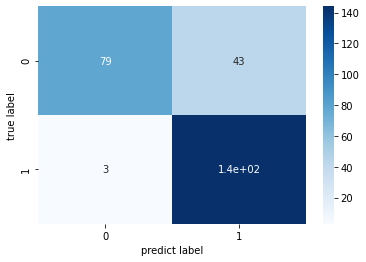

In [615]:
conf_mat(y_test, y_pred)
# merged_work.to_csv('./merged_work.csv')
work_ques_all = work_ques_all[[ 'date', 'user_id', '管理者兼作業者', '企画業務',
       'ノンコア業務（自身が本来担当ではない業務）', '管理者', '比較的慣れており，定型化できている業務',
       'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務', '作業者/参加者', '管理の業務',
       '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務', '事務業務（サポート業務、経理業務など）',
       '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）', '家（その他）', 'どちらでもない', '一人',
       '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）', '快適', '職場外のワークスペース',
       '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外', '不快', '非常に快適',
       '職場外ワークスペース', '非常に不快', 'Date_jp', 'date_x',
       'positive_score_label_x', 'depressive_score_label_x',
       'anxious_score_label_x', 'value_nemuke', 'value_hukai', 'value_boyake',
       'value_nemuke_label_x', 'value_hukai_label_x', 'value_boyake_label_x',
       'merge_date', 'date_y', 'positive_score_label_y',
       'depressive_score_label_y', 'anxious_score_label_y',
       'value_hukai_label_y', 'value_boyake_label_y', 'value_nemuke_label_y',
       'datetime_jp_x', 'value_eval', 'hour', 'kouritu_label', 'syutyu_label',
       'yoteidori_label', 'jubun_comu_label', 'kouritu_comu_label',
       'idea_label', 'seika_label', 'datetime_jp_y', 'study_new_label',
       'decide_doing_label', 'paformance_label', 'absent_by_problem_label',
       'datetime_jp_x.1', 'value_recover_label', 'datetime_jp_y.1',
       'workenga_score_label']]

In [601]:
merged_act

,Unnamed: 0_x,date,user_id,食事（業務時間外）,単独作業,趣味・休憩,家事・育児,休憩（業務時間内）,移動,Web会議,...,共同作業者,開発業務,管理業務,作業者/参加者,管理の業務,比較的新規性が高く，試行錯誤を伴う定型化できていない業務,営業業務,事務業務（サポート業務、経理業務など）,現場業務（主に肉体労働を伴うもの）,現場（主に肉体労働を伴うもの）
0,0,2021-01-01,88,0.000000,170.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-01-02,88,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-01-07,17,0.000000,0.000000,0.022100,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,220.033333,268.000000,50.033333,55.016667,0.0,0.000000,50.0,0.0
3,3,2021-01-07,33,130.000000,3360.000000,0.000000,135.00000,60.000000,0.000000,0.0,...,0.0,0.0,0.000000,480.000000,0.000000,0.000000,0.0,480.416667,0.0,0.0
4,4,2021-01-07,42,0.000000,0.159950,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.016667,0.016667,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,2021-01-31,82,0.046900,0.000000,0.000000,0.00000,0.000000,32.737517,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,1295,2021-01-31,86,0.000000,0.000000,360.000000,0.00000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1296,1296,2021-01-31,92,0.018650,0.053783,0.018883,0.00000,0.023917,0.037700,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,1297,2021-02-01,13,0.000000,0.000000,0.000000,0.01955,0.000000,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
from sklearn.metrics import confusion_matrix
def conf_mat(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues').set(xlabel="predict label", ylabel="true label")
    print(cm)

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's binary_error: 0.453532
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.453532
[3]	valid_0's binary_error: 0.453532
[4]	valid_0's binary_error: 0.453532
[5]	valid_0's binary_error: 0.453532
[6]	valid_0's binary_error: 0.453532
[7]	valid_0's binary_error: 0.453532
[8]	valid_0's binary_error: 0.356877
[9]	valid_0's binary_error: 0.260223
[10]	valid_0's binary_error: 0.249071
[11]	valid_0's binary_error: 0.237918
[12]	valid_0's binary_error: 0.237918
[13]	valid_0's binary_error: 0.219331
[14]	valid_0's binary_error: 0.215613
[15]	valid_0's binary_error: 0.197026
[16]	valid_0's binary_error: 0.193309
[17]	valid_0's binary_error: 0.189591
[18]	valid_0's binary_error: 0.185874
[19]	valid_0's binary_error: 0.189591
[20]	valid_0's binary_error: 0.189591
[21]	valid_0's binary_e

,importance
user_id,111
mets_mean,2
calory_mean,49
mets_median,0
calory_median,74
mets_var,4
calory_var,5
floor_mean,10
floor_median,0
floor_var,29


<AxesSubplot:>

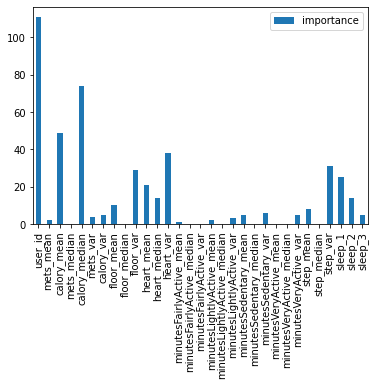

In [426]:
# def lgbm_model()
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
# ques_act_day_pred['user_id'] = ques_act_day_pred['user_id'].astype('int')
fitbit_ques=fitbit_ques[fitbit_ques['positive_score_label_x']!=1]
X = fitbit_ques[['user_id', 'mets_mean', 'calory_mean', 'mets_median',
       'calory_median', 'mets_var', 'calory_var',  'floor_mean',
       'floor_median', 'floor_var',  'heart_mean',
       'heart_median', 'heart_var',  'minutesFairlyActive_mean',
       'minutesFairlyActive_median', 'minutesFairlyActive_var', 
       'minutesLightlyActive_mean', 'minutesLightlyActive_median',
       'minutesLightlyActive_var',  'minutesSedentary_mean',
       'minutesSedentary_median', 'minutesSedentary_var', 
       'minutesVeryActive_mean', 'minutesVeryActive_median',
       'minutesVeryActive_var',  'step_mean', 'step_median',
       'step_var', 'sleep_1', 'sleep_2', 'sleep_3']]
y = fitbit_ques['positive_score_label_x'].replace(2,1).astype('int')

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': {'binary_error'},
          'num_class': 1,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0,
          'reg_alpha':0.93,
          'reg_lambda':2.3
          }

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20)

# テストデータで予測する
# y_pred = model.predict(X_test, num_iteration=model.best_iteration)
# y_pred_max = np.argmax(y_pred, axis=1)


y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1)

# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

# f1-score
f1 = f1_score(y_test,y_pred)
print('f1-score :', f1)

# logloss 
logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()


In [393]:
def objectives(trial):
    # scikit-learnでお試しデータの準備
    X = fitbit_ques[['user_id', 'mets_mean', 'calory_mean', 'mets_median',
       'calory_median', 'mets_var', 'calory_var',  'floor_mean',
       'floor_median', 'floor_var',  'heart_mean',
       'heart_median', 'heart_var',  'minutesFairlyActive_mean',
       'minutesFairlyActive_median', 'minutesFairlyActive_var', 
       'minutesLightlyActive_mean', 'minutesLightlyActive_median',
       'minutesLightlyActive_var',  'minutesSedentary_mean',
       'minutesSedentary_median', 'minutesSedentary_var', 
       'minutesVeryActive_mean', 'minutesVeryActive_median',
       'minutesVeryActive_var',  'step_mean', 'step_median',
       'step_var', 'sleep_1', 'sleep_2', 'sleep_3']]
    y = fitbit_ques['positive_score_label_x'].replace(2,1).astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # optunaでのハイパーパラメータサーチ範囲の設定
    params = {
        #fixed
        'boosting_type':'gbdt',
        'max_depth':-1,
        'learning_rate':0.1,
        'n_estimators': 1000,
        'metric':'l2',
        
        #variable
        'num_leaves': trial.suggest_int('num_leaves', 10, 300),
        'reg_alpha': trial.suggest_loguniform('reg_alpha',0.001, 10),
        'reg_lambda':trial.suggest_loguniform('reg_lambda', 0.001, 10),
    }

    # LightGBMで学習+予測
    model = lgb.LGBMRegressor(**params,random_state=0)# 追加部分
    
    # kFold交差検定で決定係数を算出し、各セットの平均値を返す
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X_train, y=y_train,scoring='r2',cv=kf)   

    return scores['test_score'].mean()

import lightgbm as lgb
from sklearn.model_selection import train_test_split,KFold,cross_validate
import sklearn.datasets
import optuna
# optunaによる最適化呼び出し
opt = optuna.create_study(direction='maximize')
opt.optimize(objectives, n_trials=5)

import optuna 
# 実行結果表示
print('最終トライアル回数:{}'.format(len(opt.trials)))
print('ベストトライアル:')
trial = opt.best_trial
print('値:{}'.format(trial.value))
print('パラメータ:')
for key, value in trial.params.items():
    print('{}:{}'.format(key, value))

[I 2021-04-30 18:03:42,598] A new study created in memory with name: no-name-26034870-681d-4414-9828-c3cb497b8f9d
[I 2021-04-30 18:03:45,578] Trial 0 finished with value: 0.45791439413333307 and parameters: {'num_leaves': 293, 'reg_alpha': 0.032134638244022545, 'reg_lambda': 0.42432476478021286}. Best is trial 0 with value: 0.45791439413333307.
[I 2021-04-30 18:03:47,995] Trial 1 finished with value: 0.4569645964835567 and parameters: {'num_leaves': 165, 'reg_alpha': 0.003697029475707485, 'reg_lambda': 0.006463941146422024}. Best is trial 0 with value: 0.45791439413333307.
[I 2021-04-30 18:03:50,252] Trial 2 finished with value: 0.4663518586394928 and parameters: {'num_leaves': 253, 'reg_alpha': 0.02607189936539663, 'reg_lambda': 0.8517414627120127}. Best is trial 2 with value: 0.4663518586394928.
[I 2021-04-30 18:03:52,632] Trial 3 finished with value: 0.45961014351745816 and parameters: {'num_leaves': 247, 'reg_alpha': 0.009957724553306693, 'reg_lambda': 0.4067657881021408}. Best is 

最終トライアル回数:5
ベストトライアル:
値:0.5016392600316141
パラメータ:
num_leaves:135
reg_alpha:0.9320641627454611
reg_lambda:2.3043849572406065
